In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from matplotlib.axes import Axes
from scipy.stats import norm
from scipy.optimize import curve_fit


fig_typeface = 'Helvetica'
fig_family = 'sans-serif'
fig_style = 'normal'

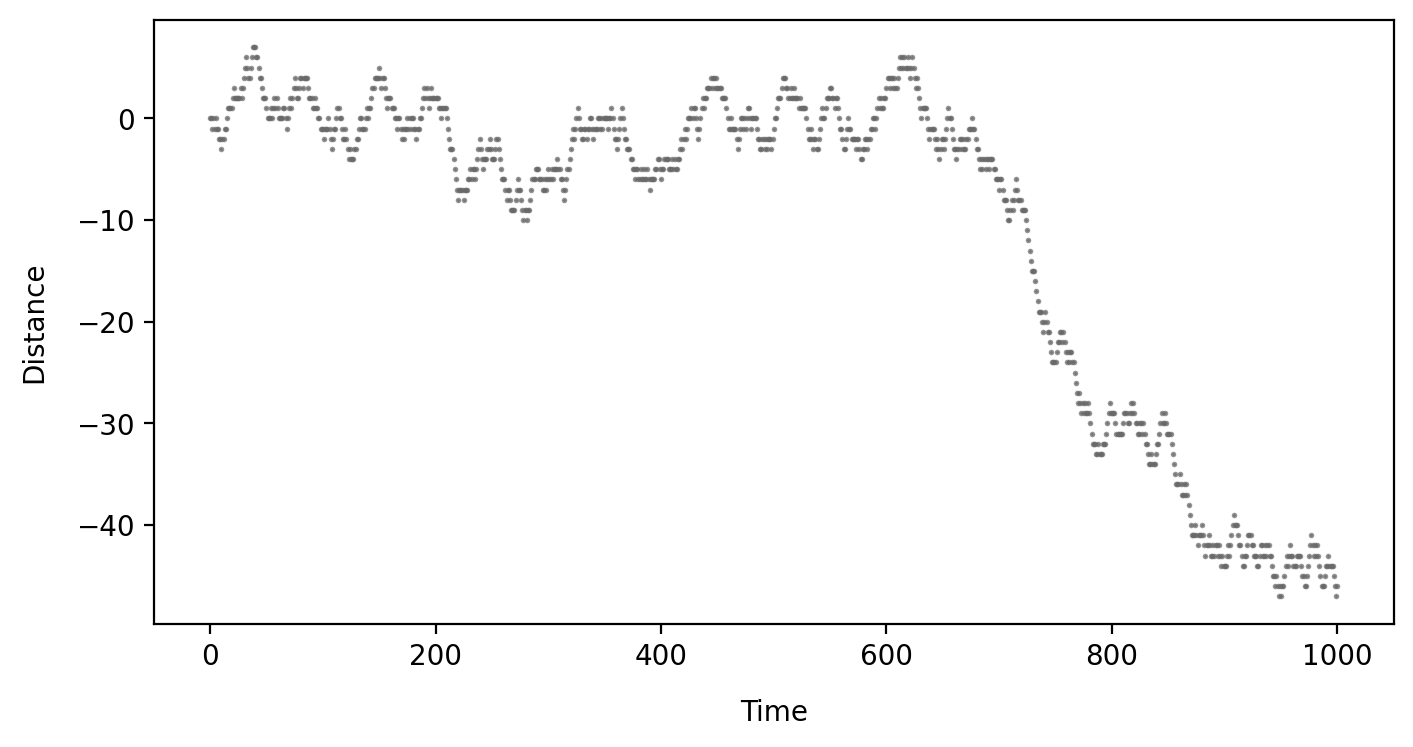

In [70]:
dims = 1
step_n = 1000
step_set = [-1,0,1]
origin = np.zeros((1,dims))

# Simulate steps in 1D
step_shape = (step_n, dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize = (8,4),dpi = 200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c='dimgrey', alpha=0.7, s=1);

ax.set_xlabel('Time', size = 10, fontdict=dict(fontsize=16,weight='light'),labelpad=10)
ax.set_ylabel('Distance',size = 10, fontdict=dict(fontsize=16,weight='light'),labelpad=10)

plt.savefig('./Desktop/2.png',bbox_inches = 'tight')

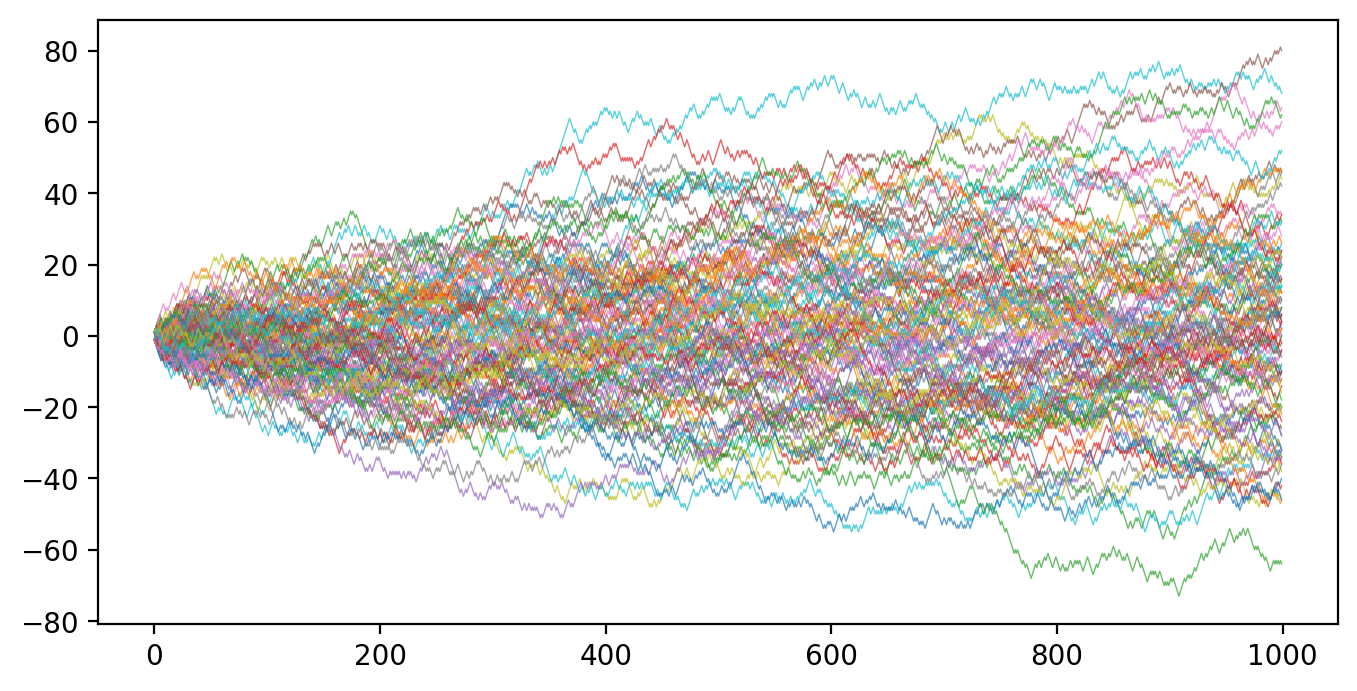

In [84]:
nwalks = 100
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) #走0或者1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

fig = plt.figure(figsize = (8,4),dpi = 200)
ax = fig.add_subplot(111)
for i in range(nwalks):
    ax.plot(walks[i], alpha=0.7, lw=0.5)
    

plt.savefig('./Desktop/4.png',bbox_inches='tight')

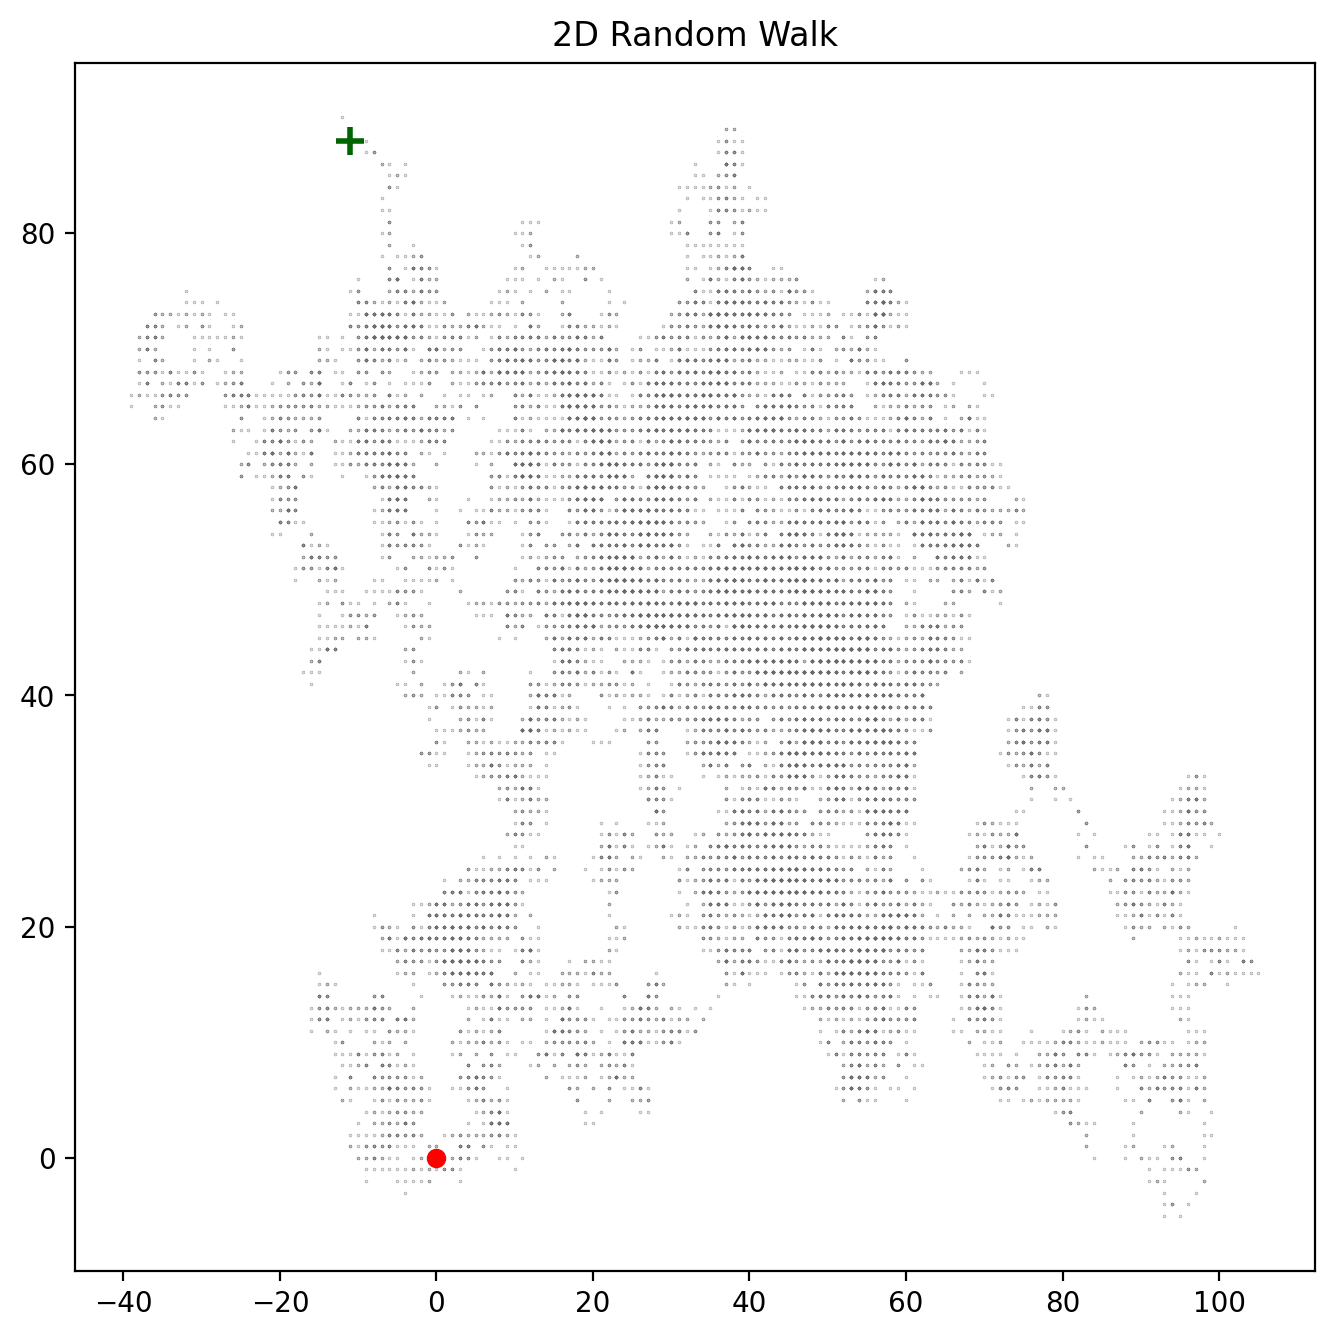

In [74]:
dims = 2
step_n = 20000
step_set = [-1,0,1]
origin = np.zeros((1,dims))

# Simulate steps in 2D
step_shape = (step_n, dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111)


ax.scatter(path[:,0],path[:,1], c='dimgrey', alpha=0.7, s=0.05)
ax.plot(start[:,0], start[:,1], c='red', marker='o')
ax.plot(stop[:,0], stop[:,1], c='darkgreen', marker='+', ms=10, mew=2)

plt.title('2D Random Walk')

plt.savefig('./Desktop/6.png')

<ipython-input-75-e8ec639961b2>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


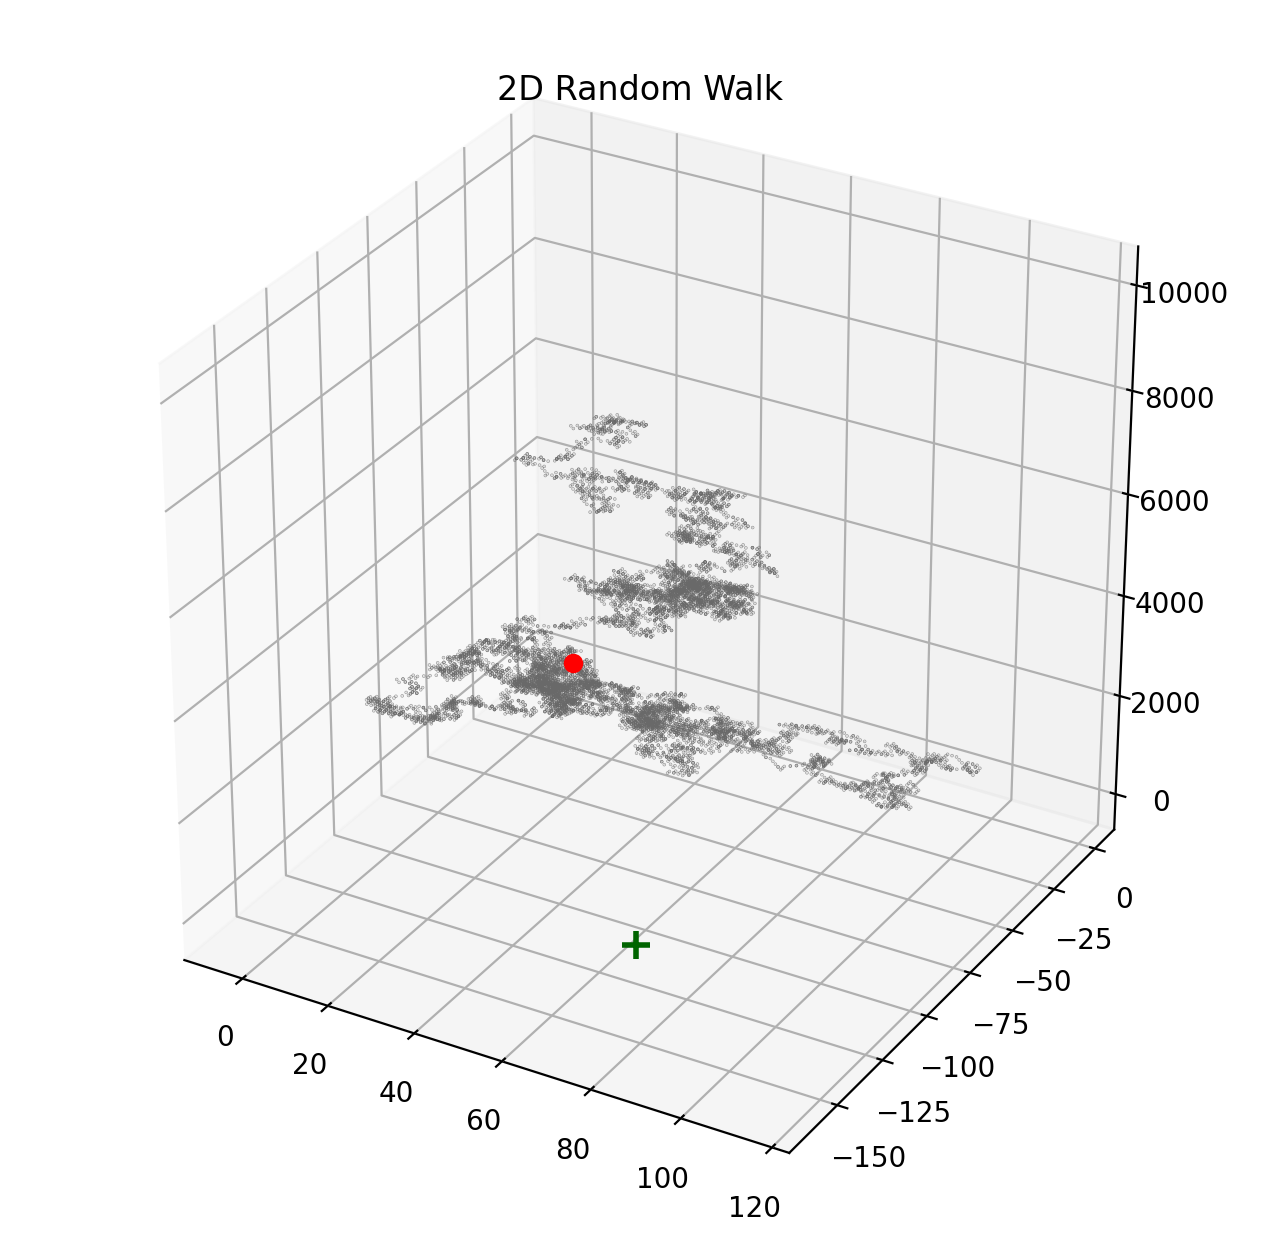

In [75]:
dims = 2
step_n = 10000
step_set = [-1,0,1]
origin = np.zeros((1,dims))

# Simulate steps in 2D
step_shape = (step_n, dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111)
ax = plt.axes(projection='3d')

ax.scatter(path[:,0],path[:,1],np.arange(step_n+1), c='dimgrey', alpha=0.7, s=0.05)
ax.plot(start[:,0], start[:,1], c='red', marker='o', zorder=5)
ax.plot(stop[:,0], stop[:,1], c='darkgreen', marker='+', ms=10, mew=2)

plt.title('2D Random Walk')

plt.savefig('./Desktop/8.png')

In [76]:
def randomcolor():
    corList = ['1','2','3','4','5','6','7','8','9','C','D','E','F']
    color = ""
    for i in range(6):
        color+=corList[random.randint(0,12)]

    return "#"+color

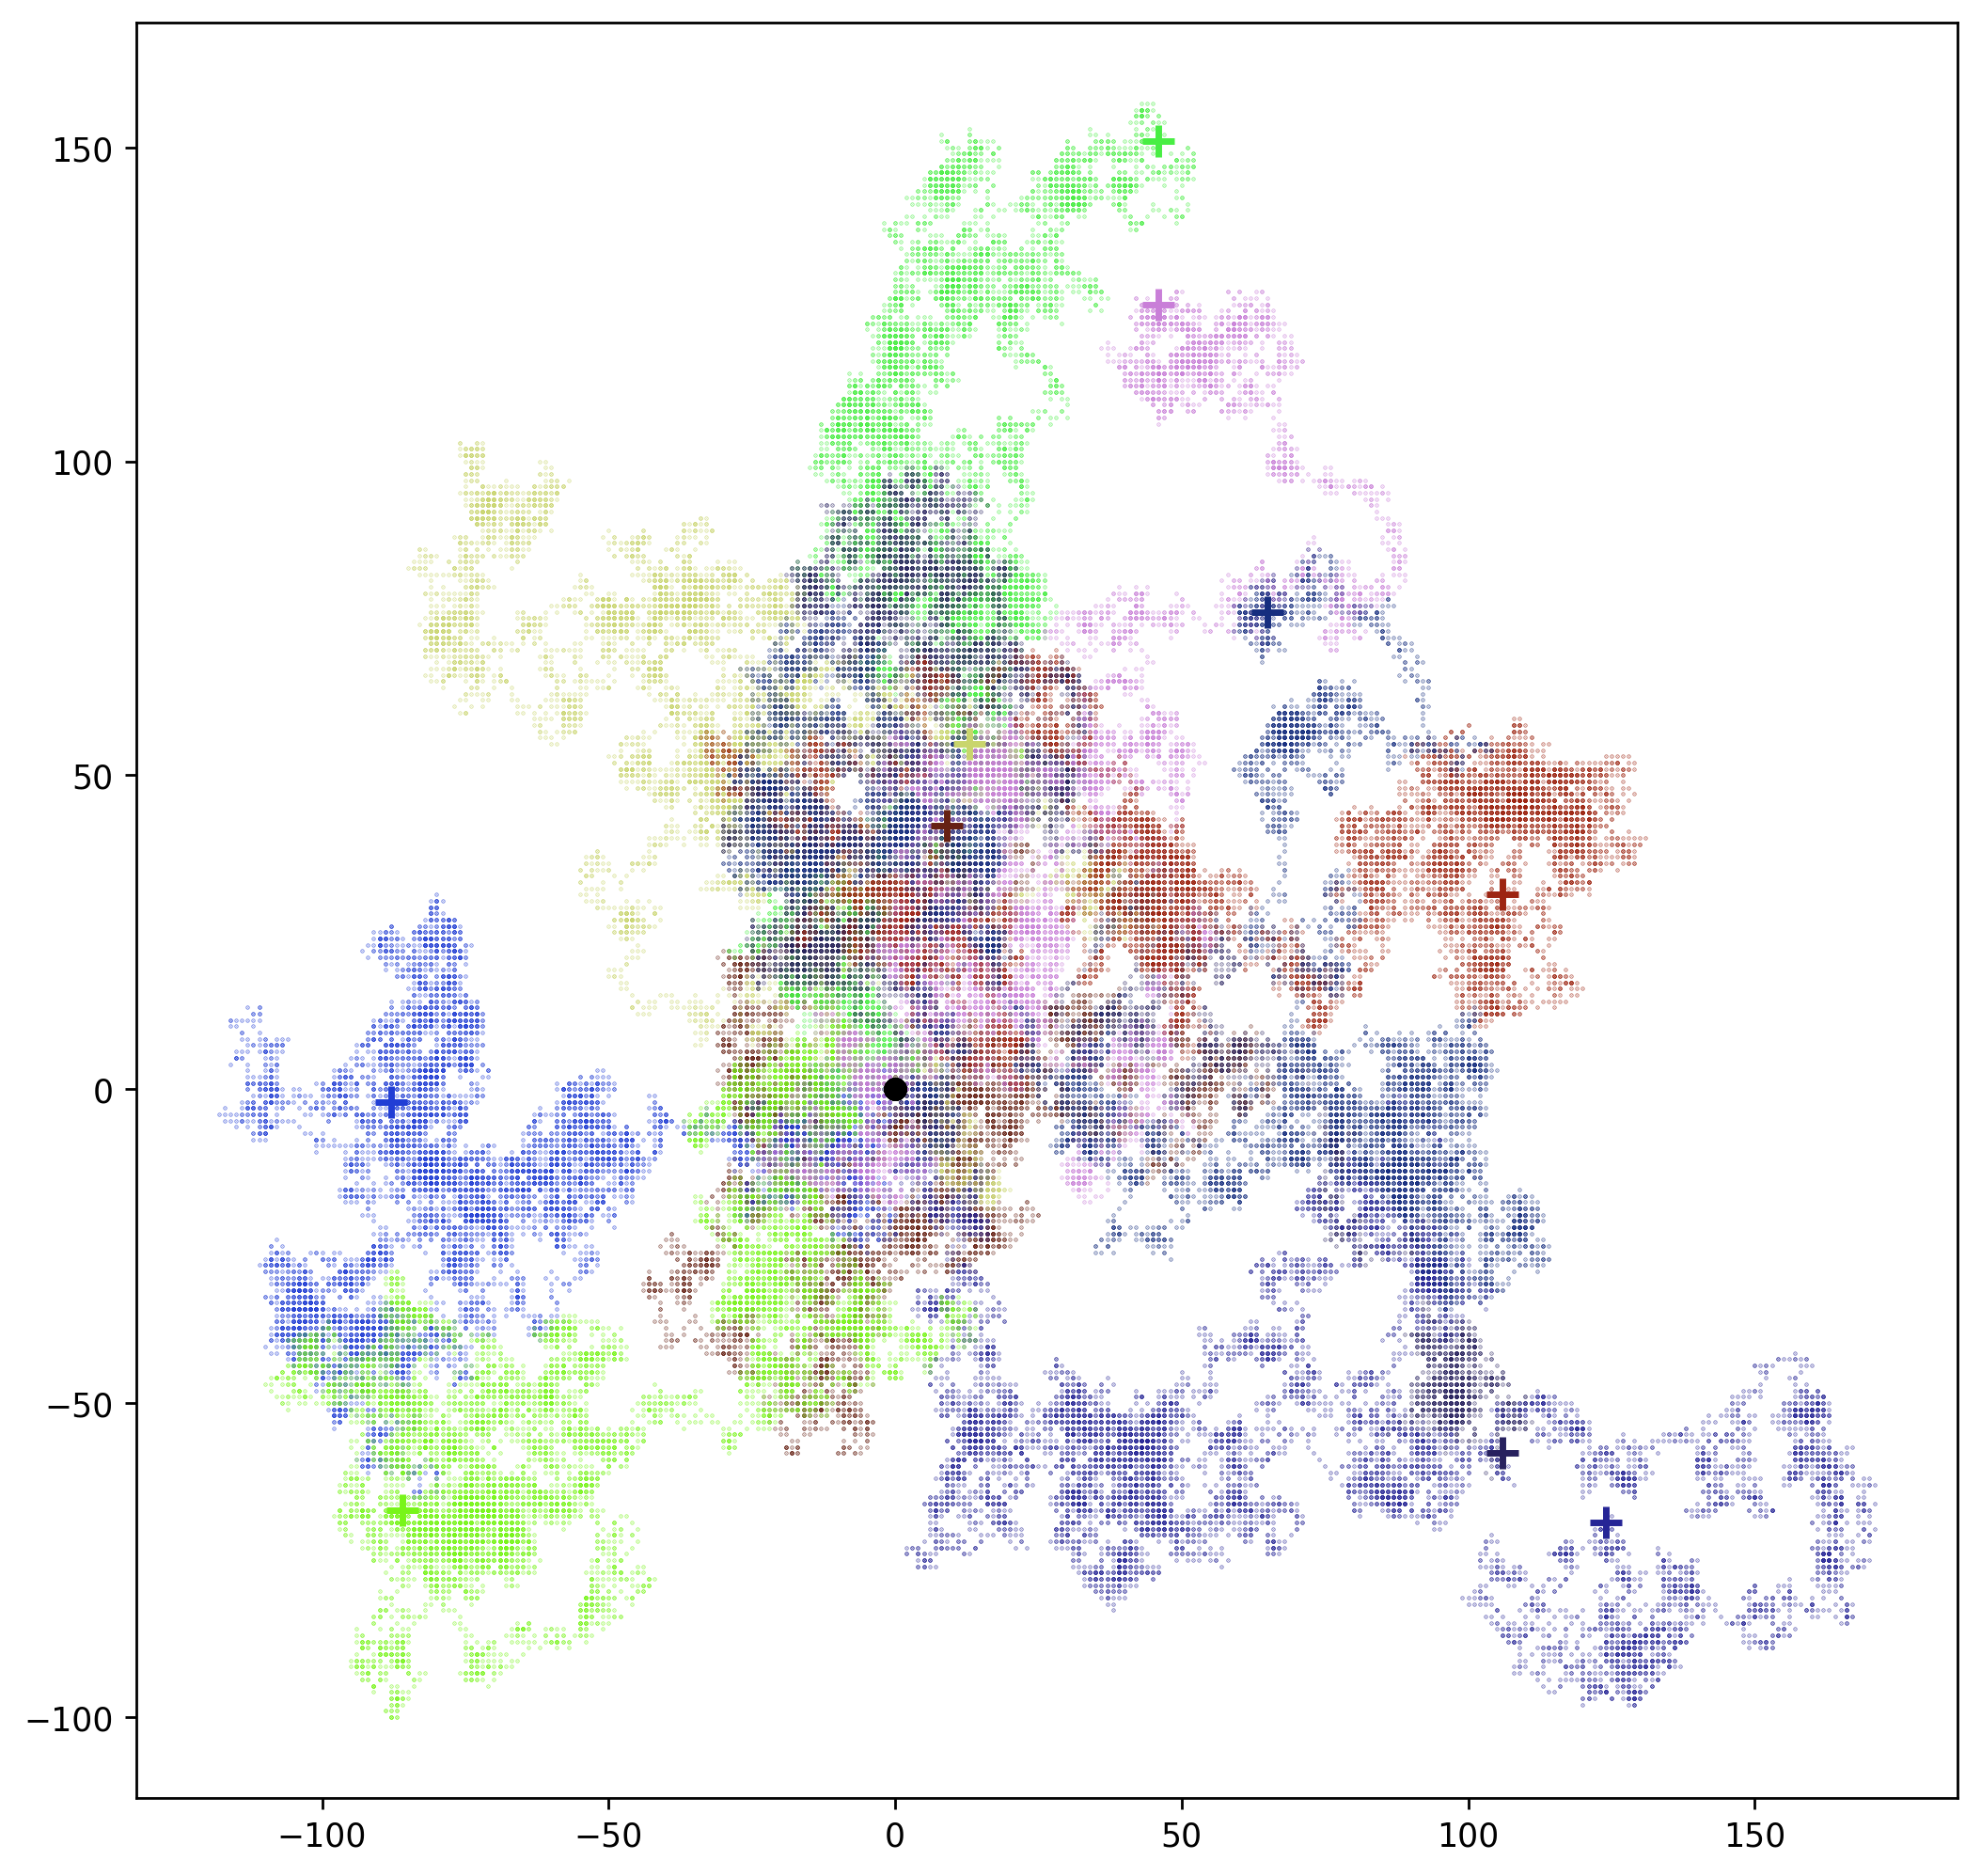

In [80]:
dims = 2
nwalks = 10
nsteps = 10000
step_set = [-1, 0, 1]
walks = np.arange(nwalks)
step_shape = (step_n,dims)

fig = plt.figure(figsize=(10,10),dpi=250)
ax = fig.add_subplot(111)


for i in range(nwalks):
    origin = np.random.randint(low = -10,high=10, size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]
    col= randomcolor()
    
    ax.scatter(path[:,0],path[:,1], c=col, alpha=0.7, s=0.05)
    ax.plot(0, 0, c='black', marker='o')
    ax.plot(stop[:,0], stop[:,1], c=col, marker='+', ms=10, mew=2)
    
    plt.savefig('./Desktop/9.png')

<ipython-input-81-84fc1b1a4f9c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


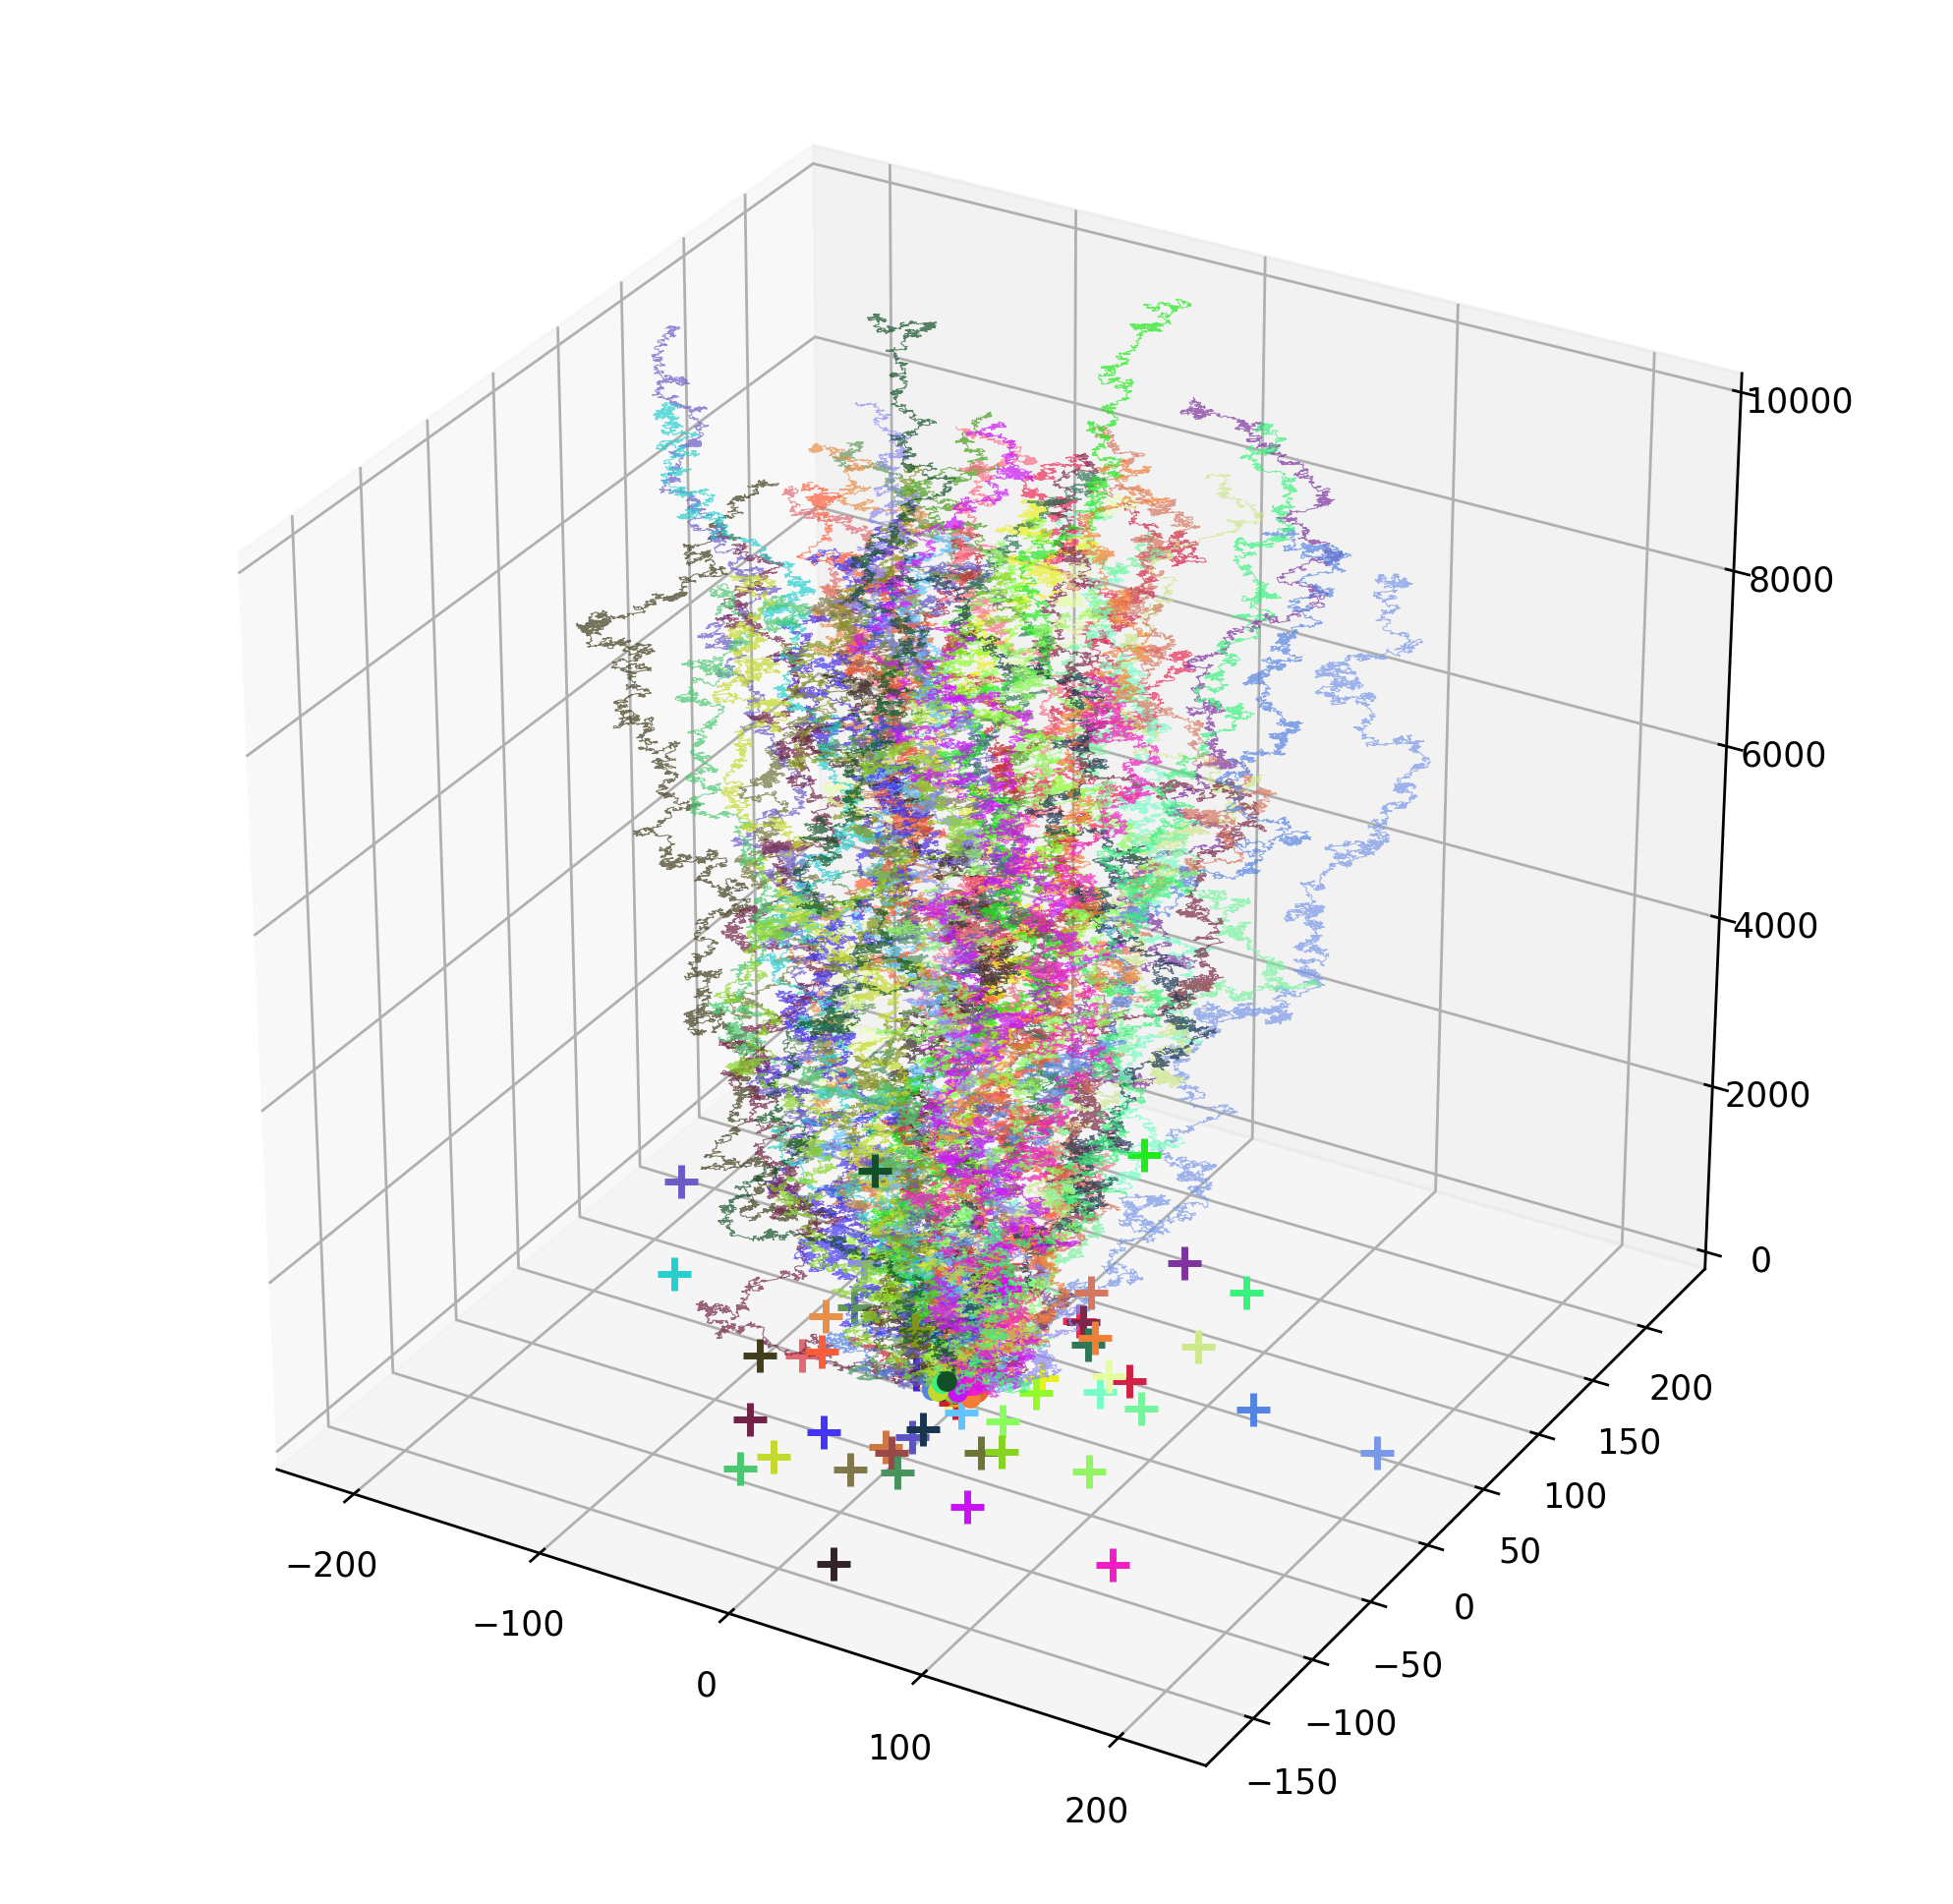

In [81]:
dims = 2
nwalks = 50
nsteps = 10000
step_set = [-1, 0, 1]
walks = np.arange(nwalks)
step_shape = (step_n,dims)

fig = plt.figure(figsize=(10,10),dpi=250)
ax = fig.add_subplot(111)
ax = plt.axes(projection='3d')

for i in range(nwalks):
    origin = np.random.randint(low = -10,high=10, size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]
    col = randomcolor()
    
    ax.plot(path[:,0],path[:,1], np.arange(step_n+1), c=col, alpha=0.7, lw=0.3)
    ax.plot(start[:,0], start[:,1], c=col, marker='o',zorder = 2, ms=5)
    ax.plot(stop[:,0], stop[:,1], c=col, marker='+', ms=10, mew=2)
    
plt.savefig('./Desktop/10.png')

In [86]:
def gaussian(x,a,b,c):
    return a * np.exp(-np.power(x - b,2) / (2 * np.power(c, 2) ))

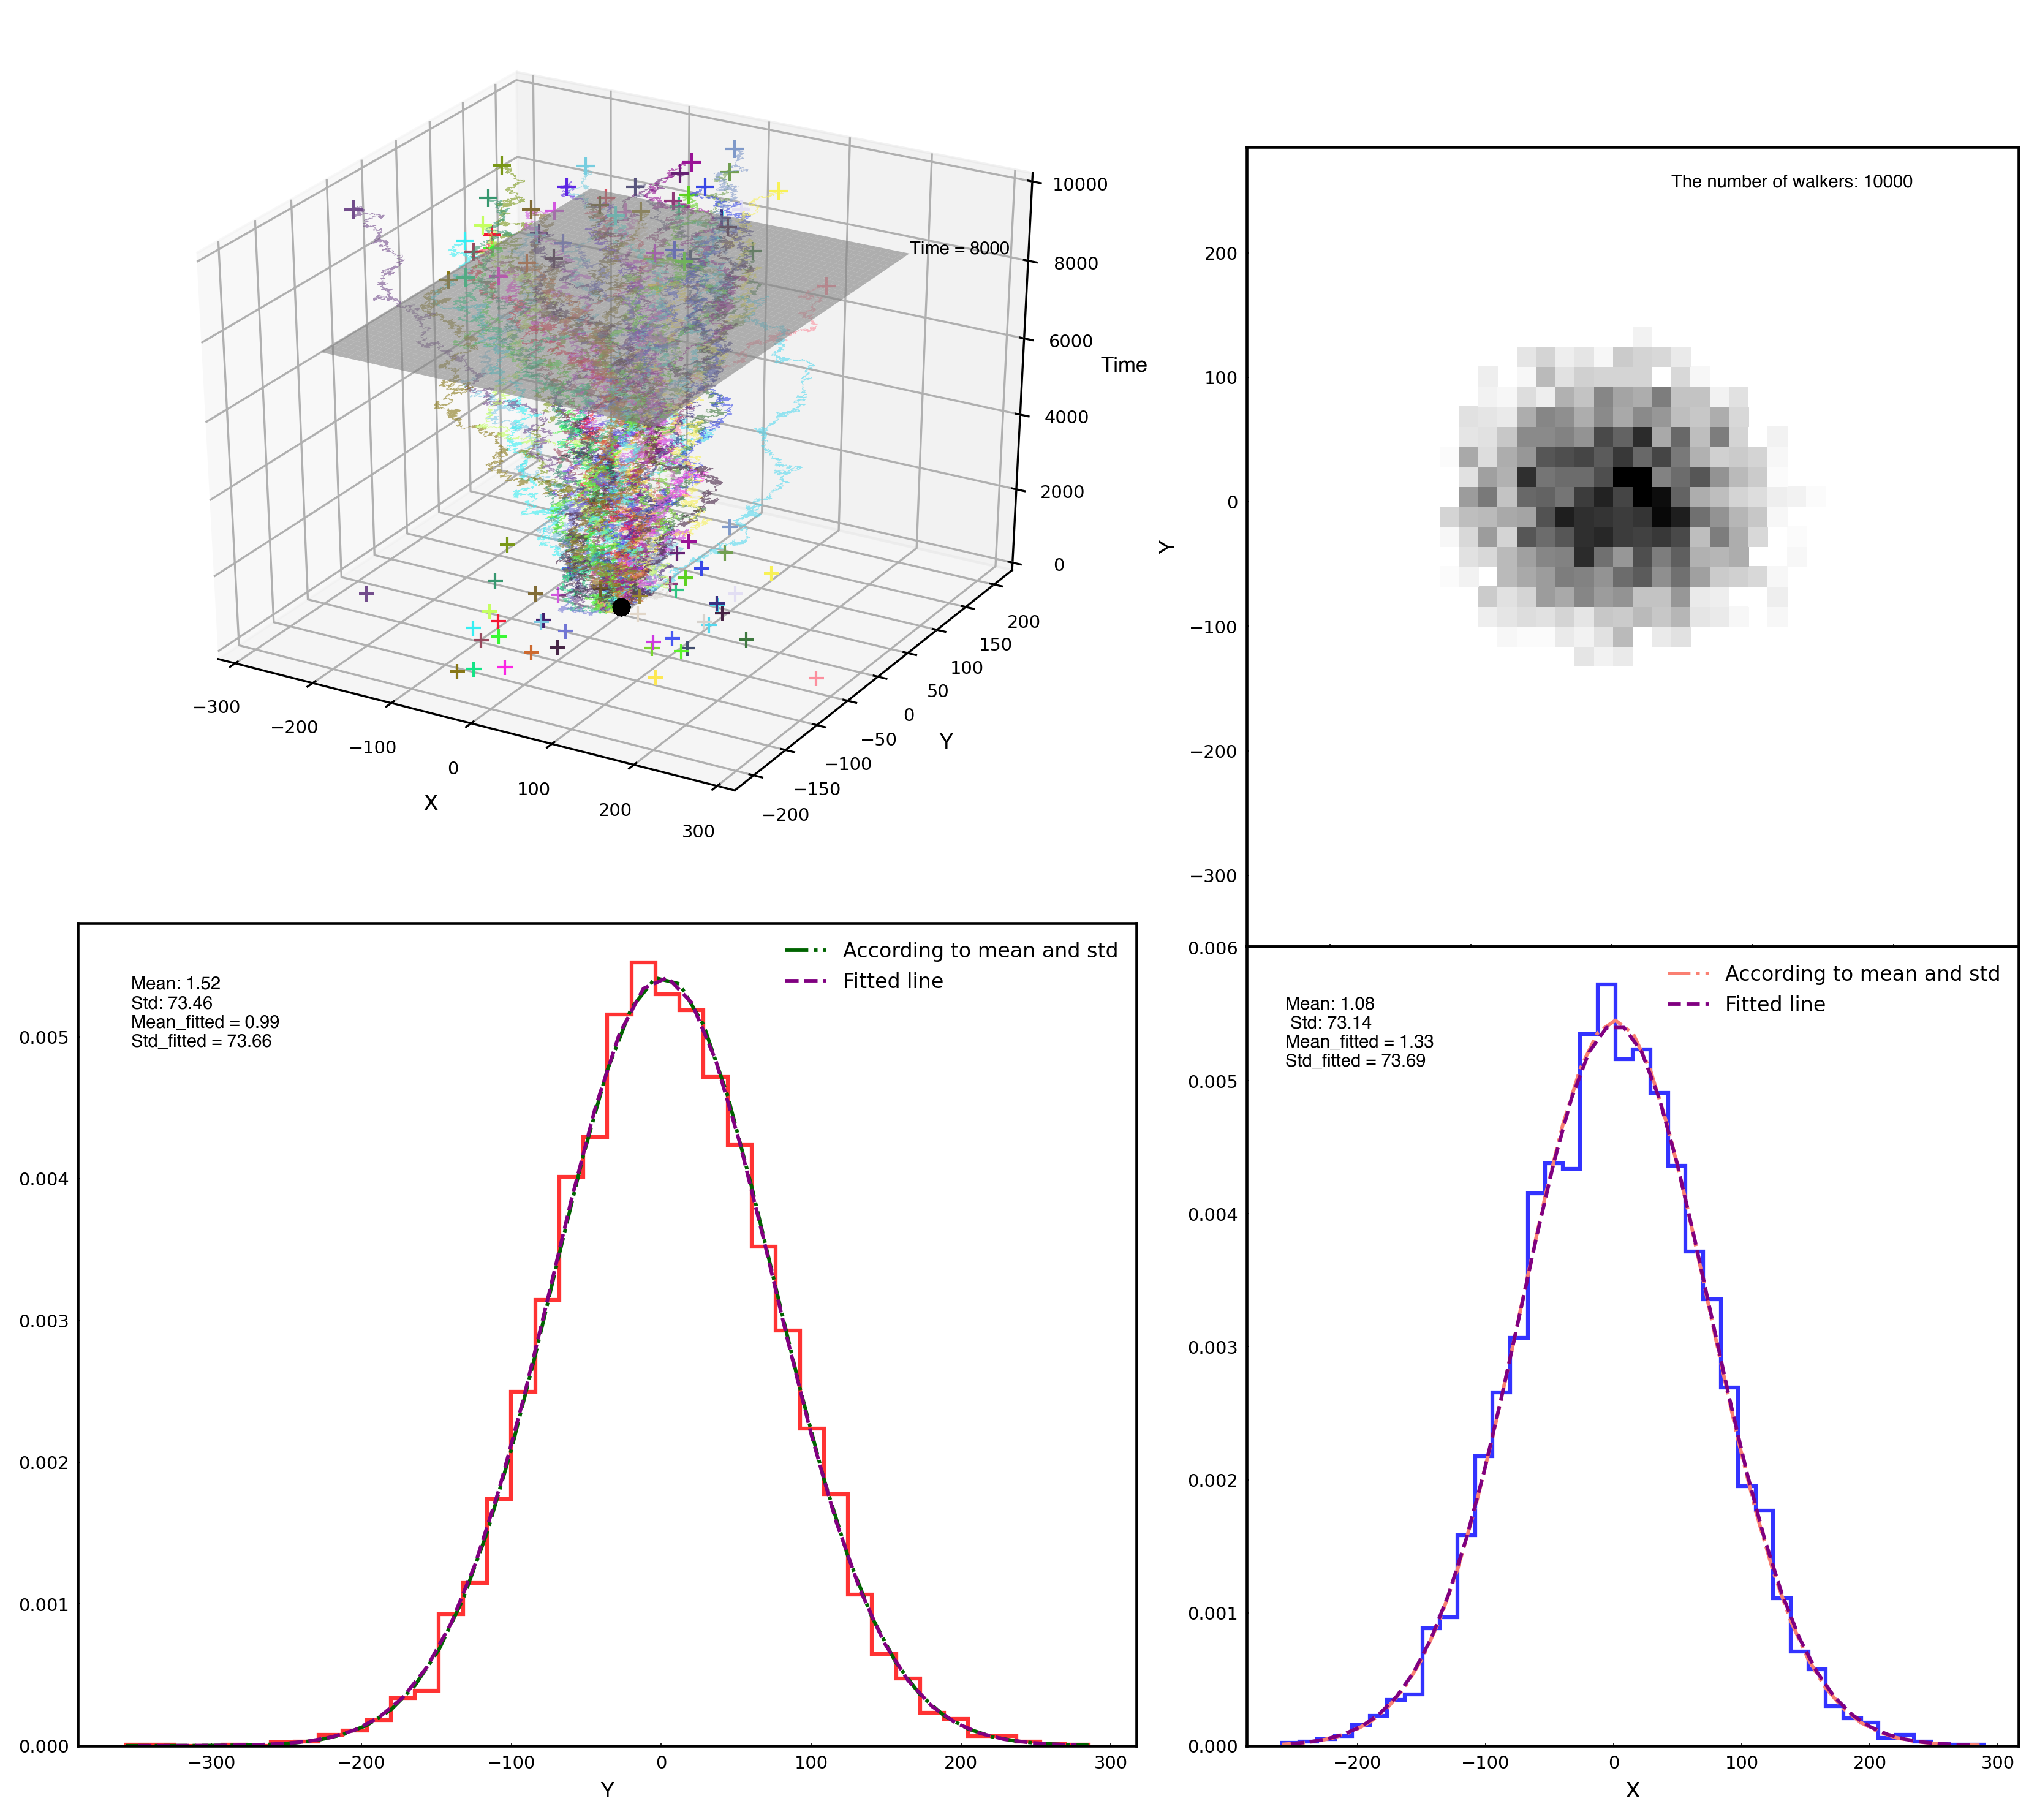

In [89]:
timek = 8000
num_walkers = 10000
above_std = 1
step_n = 10000
num_bins = 40

figure = plt.subplots(figsize = (12,10),dpi = 300)
gs1 = gridspec.GridSpec(2,1)
gs1.update(left = 0.02, right = 0.5,bottom = 0.03, top = 0.97,hspace =0.1)
ax1 = plt.subplot(gs1[0],projection = '3d')
ax3 = plt.subplot(gs1[1])
gs2 = gridspec.GridSpec(2,1)
gs2.update(left = 0.55, right = 0.9,bottom = 0.03, top = 0.9,hspace = 0.)
ax2 = plt.subplot(gs2[0])
ax4 = plt.subplot(gs2[1])

x = np.linspace(-200, 200, 900)
y = np.linspace(-200, 200, 900)
X, Y = np.meshgrid(x, y)

# -------------------------------- plot 3D  --------------------------------
# 平面 z=4.5 的部分
ax1.plot_surface(X,
                Y,
                Z=X*0+timek,
                color='darkgrey',
                alpha=0.6
               )
ax1.text(200,200,timek, 'Time = %d'%timek, size = 7, weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface)
timek_x = []; timek_y = []
for i in range(50):
    dims = 2
    step_set = [-1,0,1]
    origin = np.zeros((1,dims))
    step_shape = (step_n, dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]
    colork = randomcolor()
    ax1.plot(path[:,0],path[:,1],np.arange(step_n+1), c=colork, alpha=0.6, lw =0.2)
    ax1.plot(stop[:,0], stop[:,1],step_n, c=colork, marker='+', ms=7, mew=1)
    ax1.plot(stop[:,0], stop[:,1], c=colork, marker='+', ms=6, mew=1)
    ax1.plot(start[:,0], start[:,1], c= 'black', marker='o',ms = 6)
    
for i in range(num_walkers):
    dims = 2
    step_set = [-1,0,1]
    origin = np.zeros((1,dims))
    step_shape = (step_n, dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]
    timek_x.append(path[:,0][timek]); timek_y.append(path[:,1][timek])

    # first graph

freq,bins,patched = np.histogram2d(timek_x,timek_y, range = ([np.min(timek_x), np.max(timek_x)],[np.min(timek_y) ,np.max(timek_y)]), bins =num_bins)
h = ax2.hist2d(timek_x, timek_y,  range = ([np.min(timek_x), np.max(timek_x)],[np.min(timek_y), np.max(timek_y)]), bins =num_bins, cmap = 'gist_yarg', cmin = above_std * np.std(freq))

# second graph

ax2.text(0.55,0.95, 'The number of walkers: %d'%num_walkers,size = 7,weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface, transform = ax2.transAxes)
ny, binsy, patchesy = ax3.hist(timek_y, num_bins, density = 1, alpha = 0.8,lw = 1.5,color = 'red',range = (np.min(timek_y), np.max(timek_y)), histtype = 'step')
nx, binsx, patchesx = ax4.hist(timek_y, num_bins, density = 1, alpha = 0.8,lw = 1.5,color = 'blue',range = (np.min(timek_x), np.max(timek_x)), histtype = 'step')
y_fit = norm.pdf(binsy,np.mean(timek_y), np.std(timek_y))
x_fit = norm.pdf(binsx,np.mean(timek_x), np.std(timek_x))
ax3.plot(binsy, y_fit, ls = '-.', lw = 1.4, color = 'darkgreen',label = 'According to mean and std')
ax4.plot(binsx, x_fit, ls = '-.', lw = 1.4, color = 'salmon',label = 'According to mean and std')

# 3rd and 4th（histogram）

histy,bin_edges_y = np.histogram(timek_y,bins = num_bins , density = 1,range = (np.min(timek_y), np.max(timek_y)))
bin_centery = 0.5 * (bin_edges_y[:-1] + bin_edges_y[1:] )
popty,pcovy = curve_fit(gaussian, bin_centery, histy, p0 = [1,np.mean(timek_y),np.std(timek_y)], maxfev = 4000)

histx,bin_edges_x = np.histogram(timek_x,bins = num_bins, density = 1 ,range = (np.min(timek_x), np.max(timek_x)))
bin_centerx = 0.5 * (bin_edges_x[:-1] + bin_edges_x[1:] )
poptx,pcovx = curve_fit(gaussian, bin_centerx, histx, p0 = [1,np.mean(timek_x),np.std(timek_x)], maxfev = 4000)

ax3.plot(bin_centery, gaussian(bin_centery, popty[0], popty[1],popty[2]), ls = '--', lw = 1.4, color = 'purple',label = 'Fitted line' )
ax4.plot(bin_centerx, gaussian(bin_centerx, poptx[0], poptx[1],poptx[2]), ls = '--', lw = 1.4, color = 'purple',label = 'Fitted line' )

# 高斯拟合

ax3.text(0.05,0.85, 'Mean: %.2f\nStd: %.2f \nMean_fitted = %.2f\nStd_fitted = %.2f'%(np.mean(timek_y), np.std(timek_y), popty[1],popty[2]),size = 7,weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface, transform = ax3.transAxes)
ax4.text(0.05,0.85, 'Mean: %.2f\n Std: %.2f \nMean_fitted = %.2f\nStd_fitted = %.2f'%(np.mean(timek_x), np.std(timek_x), poptx[1],poptx[2]),size = 7,weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface, transform = ax4.transAxes)
for ax in [ax1,ax2,ax3,ax4]:
    ax.tick_params(axis = 'both', which  = 'major', labelsize = 'x-small',width = .4,length = 1, direction = 'in')
    ax.spines['bottom'].set_linewidth(1.1)
    ax.spines['top'].set_linewidth(1.1)
    ax.spines['left'].set_linewidth(1.1)
    ax.spines['right'].set_linewidth(1.1)
ax3.legend(loc = 1, fontsize = 8, markerscale = 7, frameon = True, framealpha = 0).get_frame().set_linewidth(0.0)
ax4.legend(loc = 1, fontsize = 8, markerscale = 7, frameon = True, framealpha = 0).get_frame().set_linewidth(0.0) 
ax1.set_xlabel('X',size = 'small', color = 'black', weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface)
ax1.set_ylabel('Y',size = 'small', color = 'black', weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface)
ax1.set_zlabel('Time',size = 'small', color = 'black', weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface)
ax4.set_xlabel('X',size = 'small', color = 'black', weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface)
ax3.set_xlabel('Y',size = 'small', color = 'black', weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface)
ax2.set_ylabel('Y',size = 'small', color = 'black', weight = 'bold', style = fig_style, family = fig_family, fontname = fig_typeface)


plt.savefig('./Desktop/11.png',bbox_inches = 'tight')